<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-09-09 22:36:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.5MB/s    in 2.6s    

2025-09-09 22:36:42 (57.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
# Step 3: Adding everything to SQL DB
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

65437

In [4]:
## This will hold all mapping data so one time run into Kernal
## And single time loading

# Mapping for SOPartFreq
mapping_partfreq = {
    'Daily or almost daily': 'Daily or Semi-Daily',
    'Multiple times per day': 'Multiple / Day',
    'A few times per week': 'Multiple / Week',
    'Less than once per month or monthly': 'Monthly',
    'A few times per month or weekly': 'Multiple / Month',
    'I have never participated in Q&A on Stack Overflow ': 'Never'
}

# Mapping of Age to String Grouping
mapping_age_text = {
    "Under 18 years old": 'Under 18',
    "18-24 years old": '18-24',
    "25-34 years old": '25-34',
    "35-44 years old": '35-44',
    "45-54 years old": '45-54',
    "55-64 years old": '55-64',
    "65 years or older": '65 Over',
    'Prefer not to say': np.nan
}

# Mapping of Age to int
mapping_age_int = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65,
    'Prefer not to say': np.nan
}

# Mapping of YearsProCode to int
mapping_codeyears = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Mapping of Employment
mapping_employment ={
    'Employed, full-time': 'Full-Time',
    'Independent contractor, freelancer, or self-employed': 'Independant',
    'Employed, part-time': 'Part-Time',
    'Retired': 'Retired',
    'Not employed, but looking for work': 'Unemployed'
}

# Mapping of Long Named Countries
mapping_country = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Russian Federation': 'Russia'
}

# Mapping for Employment Type (Top 5) (DevType)
mapping_devtype = {
    'Developer, full-stack': 'Full-Stack Dev.',
    'Developer, back-end': 'Back-End Dev.',
    'Developer, front-end': 'Front-End Dev.',
    'Developer, desktop or enterprise applications': 'Desktop/Enterprise Dev.',
    'Developer, mobile': 'Mobile Dev.',
    'Developer, embedded applications or devices': 'Embedded Aps./Devices',
    'Other (please specify)': 'Other',
    'Engineering manager': 'Eng. Manager',
    'Data engineer': 'Data Eng.',
    'DevOps specialist': 'DevOps',
    'Data scientist or machine learning specialist': 'Data/ML Spec.',
    'Research & Development role': 'Research & Dev.',
    'Academic researcher': 'Academic Researcher',
    'Senior Executive (C-Suite, VP, etc.)': 'Senior Exec.',
    'Cloud infrastructure engineer': 'Cloud Infrastructure Eng.',
    'Developer, QA or test': 'QA/Testing Dev.',
    'Developer, game or graphics': 'Gaming/Graphics Dev.',
    'Developer, AI': 'AI Dev.',
    'Data or business analyst': 'Data/Business Analyst',
    'Engineer, site reliability': 'Site Reliability Eng.',
    'System administrator': 'System Admin.',
    'Project manager': 'Project Manager',
    'Security professional': 'Security Pro.',
    'Scientist': 'Scientist',
    'Student': 'Student',
    'Developer Experience': 'Dev. Experience',
    'Educator': 'Educator',
    'Blockchain': 'Blockchain',
    'Product manager': 'Product Manager',
    'Hardware Engineer': 'Hardware Eng.',
    'Developer Advocate': 'Advocate Dev.',
    'Database administrator': 'Database Admin.',
    'Designer': 'Designer',
    'Marketing or sales professional': 'Marketing/Sales Pro.'
}

In [5]:
# This is a helper function as I have been repeating the same steps for each task

def plotting_pie_chart(column_name, top_count, title_of_chart, explode=0):
    # Pulling Data
    query=f'''
    SELECT "{column_name}"
    FROM main
    WHERE "{column_name}" IS NOT NULL
    '''
    df= pd.read_sql_query(query, conn)
    
    # Cleaning Data
    if explode == 1:
        df['List'] = df[column_name].str.split(';')
        df_exploded = df.explode('List')
        df_exploded['List'] = df_exploded['List'].str.strip()
        df_filtered = df_exploded['List'].value_counts().head(top_count)
    else:
        df_filtered = df.value_counts().head(top_count)
    
    #Plotting Data
    df_filtered.plot(kind='pie',
                     figsize=(5,6),
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=None
                    )
    plt.title(title_of_chart)
    plt.axis('equal')
    plt.ylabel('')
    plt.show()

### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



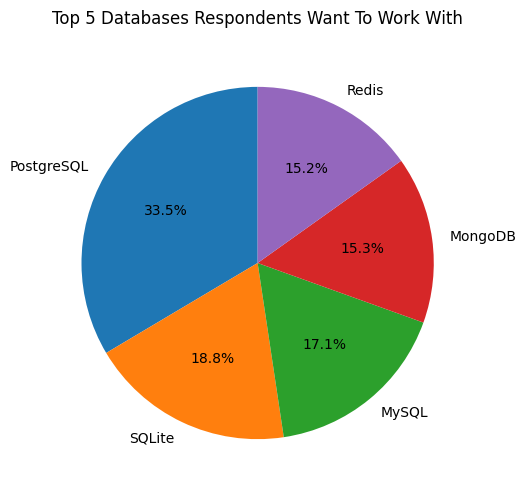

In [6]:
## Write your code here
# Pulling Data
query='''
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
'''
df= pd.read_sql_query(query, conn)

# Cleaning Data
df['DBList'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df.explode('DBList')
df_exploded['DBList'] = df_exploded['DBList'].str.strip()
df_filtered = df_exploded['DBList'].value_counts().head(5)

#Plotting Data
df_filtered.plot(kind='pie',
                 figsize=(5,6),
                 autopct='%1.1f%%',
                 startangle=90,
                 shadow=None
                )
plt.title('Top 5 Databases Respondents Want To Work With')
plt.axis('equal')
plt.ylabel('')
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



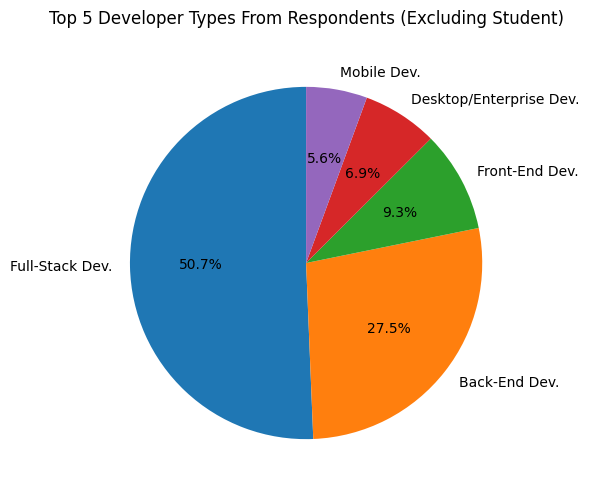

In [7]:
## Write your code here
'''
NOTE: Student turned out to be 3rd highest, and for this 
exercise, I excluded Student from the results. True results
representing the data is in the next cell, Student category included.
'''
# Pulling Data
query='''
SELECT DevType
FROM main
WHERE DevType IS NOT NULL
'''
df= pd.read_sql_query(query, conn)

# Cleaning Data
df['DevType'] = df['DevType'].map(mapping_devtype)
df_filtered = df[df['DevType'] != 'Student']
df_filtered = df_filtered['DevType'].value_counts().head(5)

#Plotting Data
df_filtered.plot(kind='pie',
                 figsize=(5,6),
                 autopct='%1.1f%%',
                 startangle=90,
                 shadow=None
                )
plt.title('Top 5 Developer Types From Respondents (Excluding Student)')
plt.axis('equal')
plt.ylabel('')
plt.show()

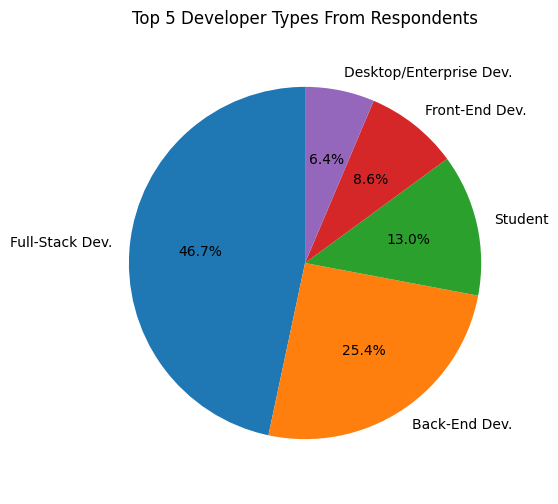

In [8]:
## Write your code here
'''
NOTE: Student category included.
'''
# Pulling Data
query='''
SELECT DevType
FROM main
WHERE DevType IS NOT NULL
'''
df= pd.read_sql_query(query, conn)

# Cleaning Data
df['DevType'] = df['DevType'].map(mapping_devtype)
df_filtered = df['DevType'].value_counts().head(5)

#Plotting Data
df_filtered.plot(kind='pie',
                 figsize=(5,6),
                 autopct='%1.1f%%',
                 startangle=90,
                 shadow=None
                )
plt.title('Top 5 Developer Types From Respondents')
plt.axis('equal')
plt.ylabel('')
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



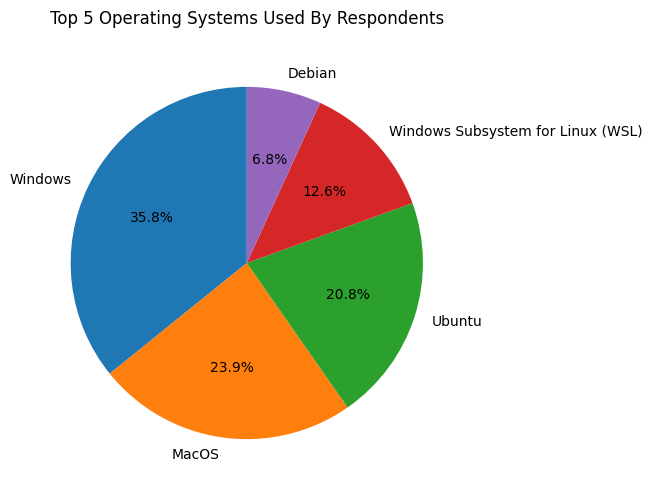

In [9]:
## Write your code here
# Pulling Data
query='''
SELECT "OpSysProfessional use"
FROM main
WHERE "OpSysProfessional use" IS NOT NULL
'''
df= pd.read_sql_query(query, conn)

# Cleaning Data
df['OpSysProfessionalUse'] = df['OpSysProfessional use'].str.split(';')
df_exploded = df.explode('OpSysProfessionalUse')
df_exploded = df_exploded['OpSysProfessionalUse'].str.strip()
df_filtered = df_exploded.value_counts().head(5)


#Plotting Data
df_filtered.plot(kind='pie',
                 figsize=(5,6),
                 autopct='%1.1f%%',
                 startangle=90,
                 shadow=None
                )
plt.title('Top 5 Operating Systems Used By Respondents')
plt.axis('equal')
plt.ylabel('')
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



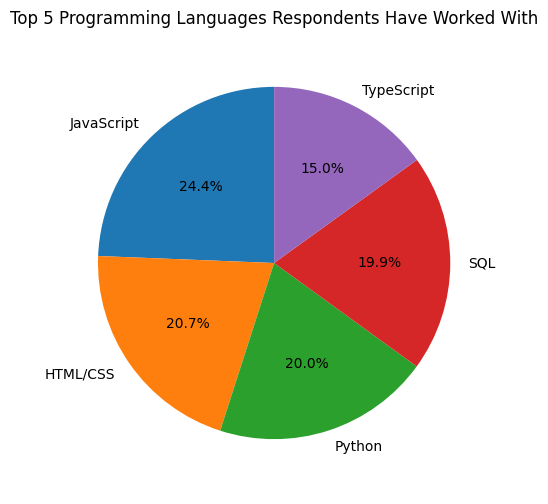

In [10]:
## Write your code here

plotting_pie_chart('LanguageHaveWorkedWith', 5, 'Top 5 Programming Languages Respondents Have Worked With', 1)

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



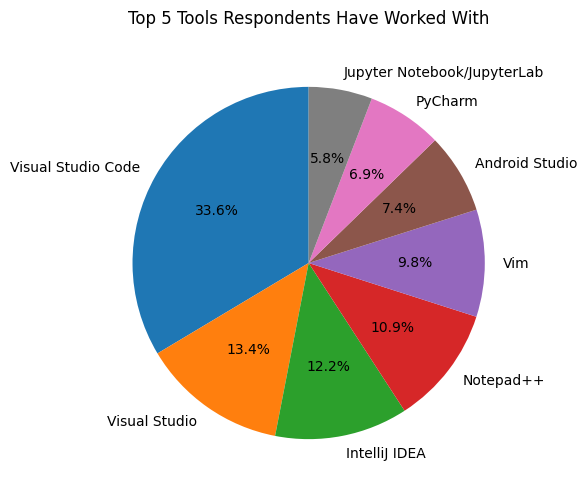

'\nNOTE: For this, I decided on top 8 instead of 5 because it was not mentioned exactly how many of the top is required.\n'

In [11]:
## Write your code here

# Using function from above
plotting_pie_chart('NEWCollabToolsHaveWorkedWith', 8, 'Top 5 Tools Respondents Have Worked With', 1)

'''
NOTE: For this, I decided on top 8 instead of 5 because it was not mentioned exactly how many of the top is required.
'''

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



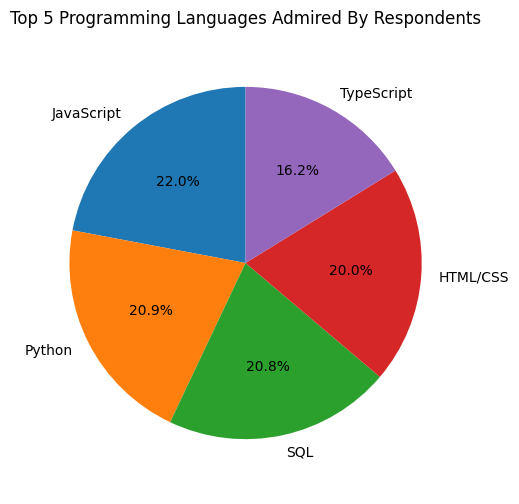

In [12]:
## Write your code here

# Using function from above
plotting_pie_chart('LanguageAdmired', 5, 'Top 5 Programming Languages Admired By Respondents', 1)

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



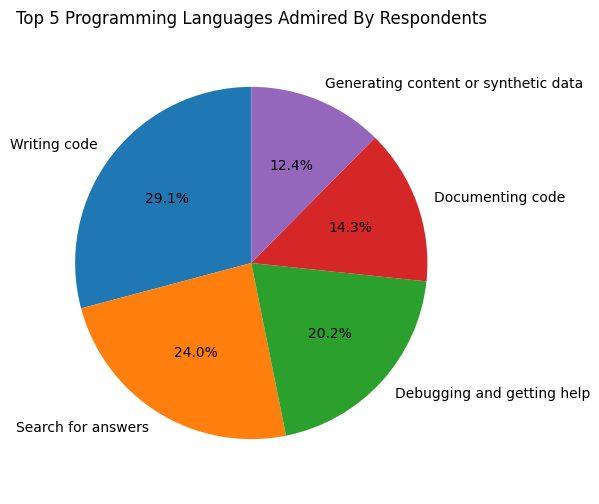

In [13]:
## Write your code here

# Using function from above
plotting_pie_chart("AIToolCurrently Using", 5, 'Top 5 Programming Languages Admired By Respondents', 1)

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



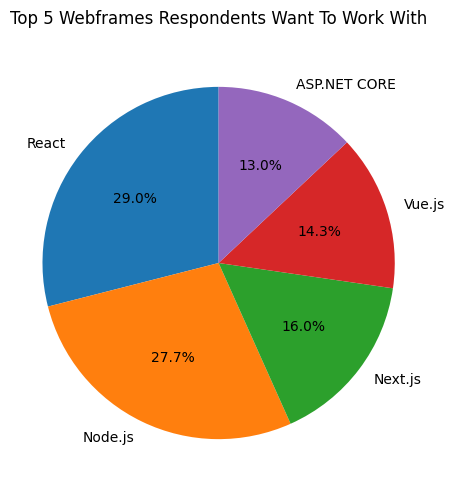

In [14]:
## Write your code here

# Using function from above
plotting_pie_chart('WebframeWantToWorkWith', 5, 'Top 5 Webframes Respondents Want To Work With', 1)

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



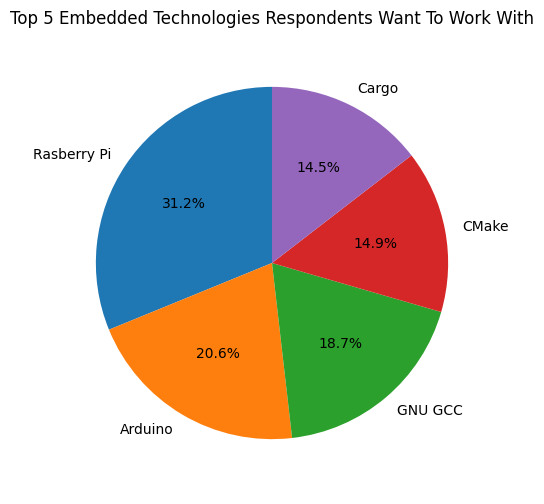

In [15]:
## Write your code here

# Using function from above
plotting_pie_chart('EmbeddedWantToWorkWith', 5, 'Top 5 Embedded Technologies Respondents Want To Work With', 1)

In [16]:
# Final step is closing the DB connection
conn.close()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
